In [7]:
import shutil
shutil.unpack_archive("Images.zip")

In [ ]:
# Other way of unzipping
import zipfile

local_zip = "./Images.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.')

In [5]:
import pandas as pd
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
# Load the labels from labels.csv
labels_df = pd.read_csv('labels.csv', sep=',', header=None)
labels_df.columns = ['image_id', 'class', 'x_min', 'y_min', 'x_max', 'y_max']

In [7]:
labels_df.head()

,image_id,class,x_min,y_min,x_max,y_max
0,0,pickup_truck,213,34,255,50
1,0,car,194,78,273,122
2,0,car,155,27,183,35
3,0,articulated_truck,43,25,109,55
4,0,car,106,32,124,45


In [9]:
# For this class, I will limit the number of images to 100
labels_df = labels_df.iloc[:100]

# Load images
images_dir = 'Images'
images = []
for index, row in labels_df.iterrows():
    print(images_dir, f"{row['image_id']:08}.jpg")
    img_path = os.path.join(images_dir, f"{row['image_id']:08}.jpg")
    img = cv2.imread(img_path)
    if img is not None:
        images.append(img)
    else:
        print(f"Error loading image: {img_path}")


Images 00000000.jpg
Images 00000000.jpg
Images 00000000.jpg
Images 00000000.jpg
Images 00000000.jpg
Images 00000001.jpg
Images 00000001.jpg
Images 00000001.jpg
Images 00000001.jpg
Images 00000001.jpg
Images 00000001.jpg
Images 00000002.jpg
Images 00000003.jpg
Images 00000003.jpg
Images 00000004.jpg
Images 00000005.jpg
Images 00000005.jpg
Images 00000006.jpg
Images 00000007.jpg
Images 00000008.jpg
Images 00000009.jpg
Images 00000009.jpg
Images 00000009.jpg
Images 00000009.jpg
Images 00000009.jpg
Images 00000009.jpg
Images 00000009.jpg
Images 00000010.jpg
Images 00000011.jpg
Images 00000011.jpg
Images 00000011.jpg
Images 00000011.jpg
Images 00000011.jpg
Images 00000012.jpg
Images 00000012.jpg
Images 00000012.jpg
Images 00000012.jpg
Images 00000012.jpg
Images 00000012.jpg
Images 00000012.jpg
Images 00000012.jpg
Images 00000013.jpg
Images 00000013.jpg
Images 00000013.jpg
Images 00000014.jpg
Images 00000014.jpg
Images 00000014.jpg
Images 00000014.jpg
Images 00000014.jpg
Images 00000015.jpg


array([[[ 24,  24,  24],
        [ 17,  17,  17],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  2,   2,   2]],

       [[  0,   0,   0],
        [ 32,  32,  32],
        [ 55,  55,  55],
        ...,
        [  3,   3,   3],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 34,  34,  34],
        [130, 130, 130],
        [199, 199, 199],
        ...,
        [  7,   7,   7],
        [  3,   3,   3],
        [  2,   2,   2]],

       ...,

       [[  4,   7,   5],
        [ 88,  91,  89],
        [148, 152, 147],
        ...,
        [  5,   5,   5],
        [  1,   1,   1],
        [  2,   2,   2]],

       [[  2,   5,   3],
        [ 87,  90,  88],
        [148, 152, 147],
        ...,
        [  5,   5,   5],
        [  0,   0,   0],
        [  2,   2,   2]],

       [[  3,   6,   4],
        [ 89,  92,  90],
        [146, 150, 145],
        ...,
        [  4,   4,   4],
        [  0,   0,   0],
        [  2,   2,   2]]], dtype=uint8)
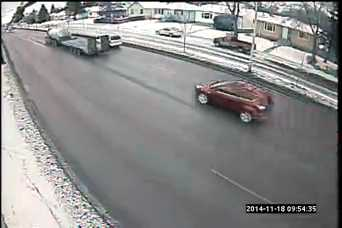

In [20]:
# Store images into an array
images[0]

In [17]:
type(images)

list

In [18]:
# Resize images
if len(images) > 0:
    processed_images = [cv2.resize(img, (224, 224)) for img in images]  # Adjust dimensions as needed
    processed_images = np.array(processed_images)
    print("Images resized successfully.")

Images resized successfully.


In [23]:
len(images)

100

In [24]:
# Process bounding boxes
labels = labels_df['class'].to_numpy()
bounding_boxes = labels_df[['x_min', 'y_min', 'x_max', 'y_max']].to_numpy()

# Convert labels to one-hot encoding
unique_labels = np.unique(labels)
label_to_index = {label: index for index, label in enumerate(unique_labels)}
index_to_label = {index: label for index, label in enumerate(unique_labels)}
labels = np.array([label_to_index[label] for label in labels])

In [ ]:
x = etc... etc... etc... model of your choice

# At the end of your model, use two outputs:
category = layers.Dense( etc..., name='category')(x)
bounding_box = layers.Dense(4, name='bounding_box')(x)
x = etc... etc... e
model = keras.Model(inputs=inputs, outputs=[category, bounding_box])

In [ ]:
model.compile(optimizer='adam',
              loss={'category': 'sparse_categorical_crossentropy', 'bounding_box': 'mse'},
              metrics={'category': 'accuracy', 'bounding_box': 'mae'})

model.fit(X_train, {'category': y_train, 'bounding_box': bbox_train}, epochs=?????, validation_data=(X_test, {'category': y_test, 'bounding_box': bbox_test}))

In [ ]:
# Evaluate
test_results = model.evaluate(X_test, {'category': y_test, 'bounding_box': bbox_test}, verbose=2)
print('\nTest results:', test_results)

7/7 - 1s - loss: 23616.3984 - vehicle_class_loss: 656.5056 - bounding_box_loss: 22959.8906 - vehicle_class_accuracy: 0.0400 - bounding_box_mae: 119.6237 - 1s/epoch - 191ms/step

Test results: [23616.3984375, 656.5055541992188, 22959.890625, 0.03999999910593033, 119.62367248535156]
